In [58]:
####Imoport Libraries

In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [60]:
#task1 mergeing 12months of data files into a single file we can use concat function 

all_months_data = pd.DataFrame()


files = [file for file in os.listdir('sales_data')]

for file in files:
    df = pd.read_csv('sales_data/'+file)
    all_months_data=pd.concat([all_months_data,df])

In [86]:
all_months_data.to_csv('All_Months.csv',index=False)
all_data=pd.read_csv('All_Months.csv')

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [62]:
all_data['Month']= all_data['Order Date'].str[0:2]

In [63]:
df_nan = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='any')


In [64]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


In [78]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'] )

In [79]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [83]:
#best month sales 
results=all_data.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales,Hour
Month,,,,
1,10903,1811768.38,1822256.73,139485
2,13449,2188884.72,2202022.42,172669
3,17005,2791207.83,2807100.38,218969
4,20558,3367671.02,3390670.24,262259
5,18667,3135125.13,3152606.75,238780


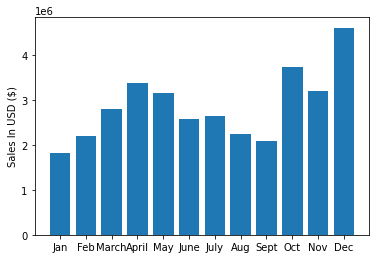

In [81]:
months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales In USD ($)')
plt.show()

In [69]:
#what city has highest sales 
#or we can make a function but access as .apply(lambda x: get_city)
def get_state(addr):
    return addr.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' +get_state(x))

In [70]:
results=all_data.groupby('City').sum()

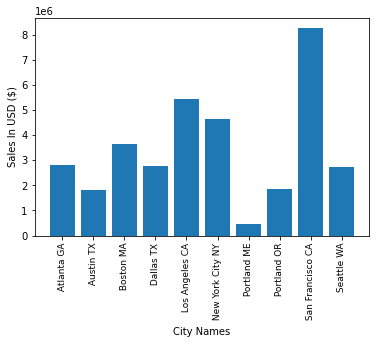

In [71]:
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=9)
plt.ylabel('Sales In USD ($)')
plt.xlabel('City Names')
plt.show()

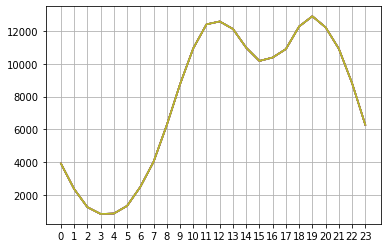

In [72]:
#what time is the most purchases
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']= all_data['Order Date'].dt.hour
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

In [73]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston MA,19
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City NY,19
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco CA,18
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco CA,18


In [84]:
#finding items that are often sold together 
#first we find the orders with multiple products i.e they have the same order id 

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

/Users/jayy/tensorflow_macos_venv/lib/python3.8/site-packages/pandas-1.4.0.dev0+124.g29094b6aae-py3.8-macosx-10.14.6-arm64.egg/pandas/core/frame.py:3602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [75]:
#count the pairs which occur together 
from itertools import combinations 
from collections import Counter 

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

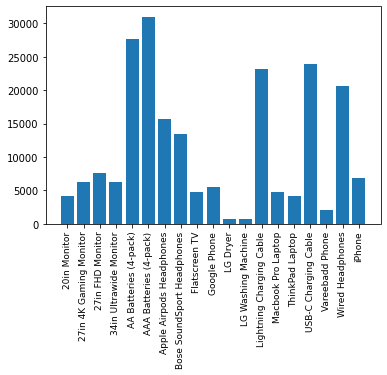

In [76]:
#what product is sold the most

mf = all_data.groupby('Product') 
quant_ordered = mf.sum()['Quantity Ordered']
products = [product for product,df in mf]
plt.bar(products,quant_ordered)
plt.xticks(products,rotation='vertical',size=9)
plt.show()

/var/folders/cm/00fvvdxs78jdj3hcp2lgq_dh0000gn/T/ipykernel_18128/1313428366.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


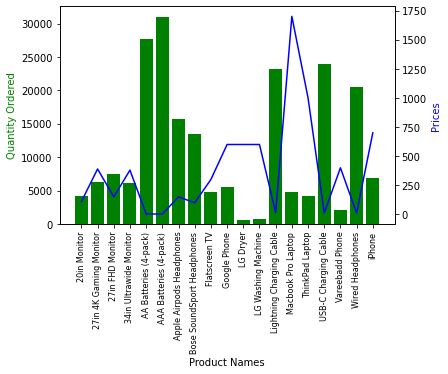

In [77]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

#double plotting 

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quant_ordered,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('Product Names')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()